#                            **`CROP PRODUCTION ANALYSIS IN INDIA`**

**`DATA`** **`CLEANING`**



IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/Crop Production data.xlsx')

In [ ]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


Now, Describe each feature of the dataset:
1. `State_Name`: It describe the name of the states in India.
2. `District_Name`: It indicates the districts present in each state.
3. `Crop_Year`: It describes the Year in which we harvest a particular crop.
4. `Season`: It describes the diverse climatic conditions that allow for multiple cropping seasons
5. `Crop`: It indicates the name of the crop.
6. `Area`: Total land area in which a particular crop is grown.
7. `Production`: It describes the total production of a particular crop.

In [ ]:
df.shape

(246091, 7)

In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [ ]:
# Correcting typos or inconsistencies in categorical data
df['State_Name'] = df['State_Name'].str.strip()
df['State_Name'].replace('Andman and Nicobar Islands', 'Andaman and Nicobar Islands', inplace=True)

In [ ]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [74]:
#Dropping null values, since it is just 1% of the dataset, does not create any impact on data.
df.dropna(subset=['Production'], inplace = True)

In [75]:
df.shape

(242357, 7)

In [76]:
# Replace 'Winter' with 'Rabi' and 'Summer' with 'Zaid'
df['Season'].replace({'Winter': 'Rabi', 'Summer': 'Zaid'}, inplace=True)

`Note`: In context of Indian agriculture, "winter" and "Rabi" can often be considered the same. The Rabi season is also referred to as the winter cropping season. And same with "Summer" and "Zaid".

In [77]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00


In [78]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [80]:
df.shape

(242357, 7)

In [81]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Zaid,Rice,306.00,801.00
246087,West Bengal,PURULIA,2014,Zaid,Sesamum,627.00,463.00
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00
246089,West Bengal,PURULIA,2014,Rabi,Rice,279151.00,597899.00


In [82]:
import os

directory = 'data/clean'

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

In [83]:
# Exporting clean agriculture data into csv file.

df1 = df.to_csv("data/clean/Crop Production data.csv", index = False)

In [84]:
df1 = pd.read_csv('/content/cleaned_data.csv')

In [85]:
df1.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00


In [86]:
df1.shape

(242357, 7)

In [87]:
df1

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.00,2000.00
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.00,1.00
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.00,641.00
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.00,165.00
...,...,...,...,...,...,...,...
242352,West Bengal,PURULIA,2014,Zaid,Rice,306.00,801.00
242353,West Bengal,PURULIA,2014,Zaid,Sesamum,627.00,463.00
242354,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.00,16250.00
242355,West Bengal,PURULIA,2014,Rabi,Rice,279151.00,597899.00


`Data Analysis`

In [88]:
#getting all states name
state_names = df['State_Name'].unique()

state_names

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [89]:
df['State_Name'].nunique()

33

There are 33 states in total in which four are union territories i.e. Andaman and Nicobar Islands, Dadra and Nagar Haveli, Chandigarh, Puducherry.

In [90]:
#getting all district names
district_names = df['District_Name'].unique()
district_names

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [91]:
df1['District_Name'].nunique()

646

Total 646 district are there in the dataset

In [92]:
crop_year = df1['Crop_Year'].unique()
crop_year

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

We have dataset of 19 years from 1997 to 2015.

In [93]:
total_season = df1['Season'].unique()
total_season

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Zaid'], dtype=object)

A total of four seasons are mentioned in the dataset of which three are main crop seasons i.e. Kharif, Rabi, Zaid.

Autumn is more of a transitional period overlapping with the end of Kharif and the beginning of Rabi.

Whole Year signifies in any of the season

In [94]:
total_crop = df1['Crop'].nunique()
total_crop

124

There are 124 different crops are grown in india in last 19 years as per the dataset

In [95]:
#calculating total production of crops from India in last 19 years
np.add.reduce(df1['Production'])

141176114967.39

In [96]:
# Analyzing the differences in production across different states and districts.
production_by_state = df1.groupby(['State_Name', 'District_Name'])['Production'].mean().reset_index()
pd.set_option('display.float_format', '{:.2f}'.format)

production_by_state

,State_Name,District_Name,Production
0,Andaman and Nicobar Islands,NICOBARS,6502668.28
1,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,1548316.67
2,Andaman and Nicobar Islands,SOUTH ANDAMANS,1893269.59
3,Andhra Pradesh,ANANTAPUR,103956.11
4,Andhra Pradesh,CHITTOOR,478435.51
...,...,...,...
647,West Bengal,MEDINIPUR EAST,329591.65
648,West Bengal,MEDINIPUR WEST,168454.79
649,West Bengal,MURSHIDABAD,343000.50
650,West Bengal,NADIA,159265.42


`Observation`: Crop production varies significantly by state and district due to regional climatic, soil, and management practices.

In [98]:
# Analyzing the difference in production across different season
production_by_season = df1.groupby('Season')['Production'].mean().reset_index()

pd.set_option('display.float_format', '{:.2f}'.format)

production_by_season

,Season,Production
0,Autumn,13065.67
1,Kharif,42743.34
2,Rabi,34432.53
3,Whole Year,2395011.98
4,Zaid,11522.38


`Observation`:  The season (e.g. Kharif, Rabi) has a significant impact on crop production.

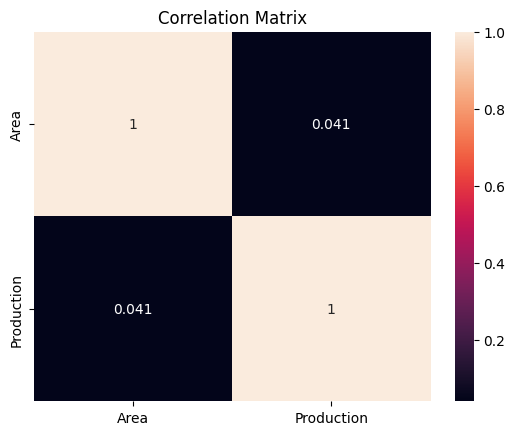

In [99]:
# Calculate correlation matrix
correlation_matrix = df[['Area', 'Production']].corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


`Observation`: The correlation coefficient of 0.041 indicates a very weak positive correlation between the area cultivated ('Area') and crop production ('Production').
This suggests that in this specific dataset, the area cultivated does not have a strong influence on the production levels. There are other factors which might have more significant impact on production like soil quality, farming technique or weather condition.

In [100]:
production_by_crop = df1.groupby('Crop')['Production'].mean().reset_index()

production_by_crop = production_by_crop.sort_values(by='Production', ascending=False)

production_by_crop

,Crop,Production
28,Coconut,66384897.45
106,Sugarcane,707254.57
113,Total foodgrain,230163.60
119,Wheat,169183.25
49,Jute,128947.57
...,...,...
89,Pump Kin,0.00
94,Ribed Guard,0.00
11,Beet Root,0.00
104,Snak Guard,0.00


In [102]:
production_by_crop['Production']

,Crop,Production
28,Coconut,66384897.45
106,Sugarcane,707254.57
113,Total foodgrain,230163.60
119,Wheat,169183.25
49,Jute,128947.57
...,...,...
89,Pump Kin,0.00
94,Ribed Guard,0.00
11,Beet Root,0.00
104,Snak Guard,0.00


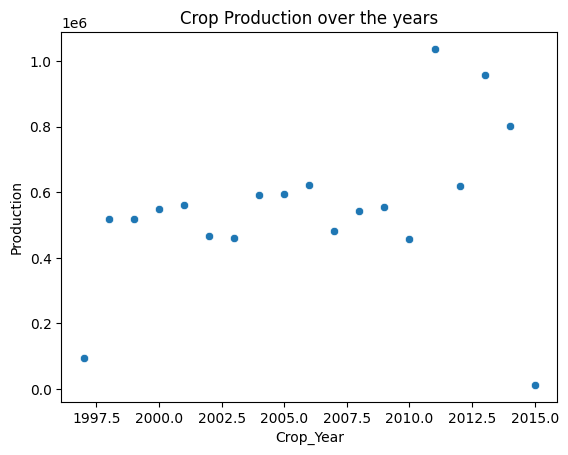

In [ ]:
production_by_years = df1.groupby('Crop_Year')['Production'].mean().reset_index()

sns.scatterplot(data=production_by_years, x='Crop_Year', y='Production')
plt.title('Crop Production over the years')
plt.show()

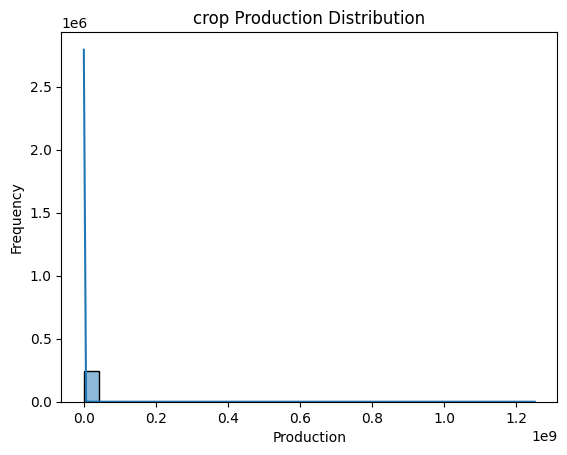

In [ ]:
sns.histplot(df1['Production'], bins=30, kde=True)
plt.title('crop Production Distribution')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()